### Carga de datos

In [11]:
#Importo librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
%matplotlib inline
plt.style.use('default')
sns.set()

In [4]:
#Funciones auxiliares
def mostrar_porcentaje_barplot(ax):
    suma = 0
    for p in ax.patches:
        suma += p.get_height()
    for p in ax.patches:
        ax.annotate(str(np.round(100 *(p.get_height() / suma),decimals=2)) + "%", (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
def mostrar_valores_barplot(ax):
    for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [5]:
#Cargo el DataFrame
df = pd.read_csv('events.csv', low_memory = False, parse_dates = ['timestamp'], infer_datetime_format = True,
                    dtype = {'event': 'category','condition': 'category','storage': 'category', 'color': 'category', 'staticpage': 'category', 'campaign_source': 'category', 'search_engine': 'category', 'channel': 'category', 'new_vs_returning': 'category', 'region': 'category', 'country': 'category', 'device_type': 'category'})

## Leads

### Cantidad de usuarios que solicitaron notificacion de stock

In [6]:
leads = df.loc[df['event'] == 'lead', ['timestamp', 'person', 'model']]
conversions = df.loc[df['event'] == 'conversion', ['timestamp', 'person', 'model']]
checkouts = df.loc[df['event'] == 'checkout', ['timestamp', 'person', 'model']]

In [7]:
len(leads['person'].unique())

291

291 usuarios solicitaron notificacion por faltante de stock

In [8]:
len(conversions['person'].unique())

716

716 usuarios realizaron al menos una conversion

### Leads semanales

Text(0.5,1,'Leads semanales')

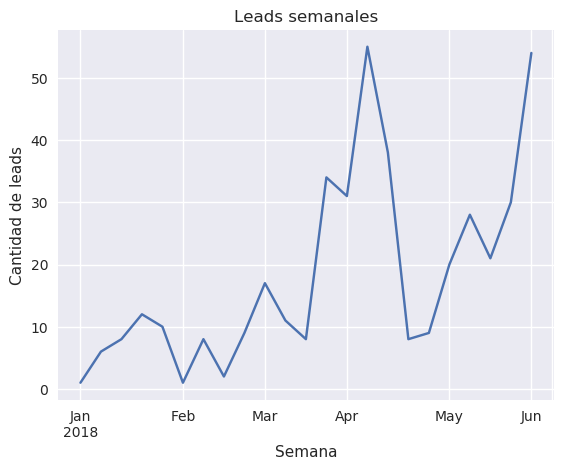

In [9]:
leads_by_week = leads.loc[:, ['timestamp']].copy()
leads_by_week['semana'] = leads_by_week['timestamp'].dt.week - 1
leads_by_week = leads_by_week[leads_by_week['semana'] != leads_by_week['semana'].max()] #Borro la ultima semana incompleta
leads_by_week['semana'] = pd.to_datetime('2018', format='%Y') + pd.to_timedelta(leads_by_week['semana'].mul(7).astype('str') + ' days')

leads_weeks = leads_by_week['semana'].value_counts().to_frame().sort_index()
ax = leads_weeks['semana'].plot()
ax.set(xlabel='Semana', ylabel='Cantidad de leads')
ax.set_title('Leads semanales')

### Relacion leads y conversiones

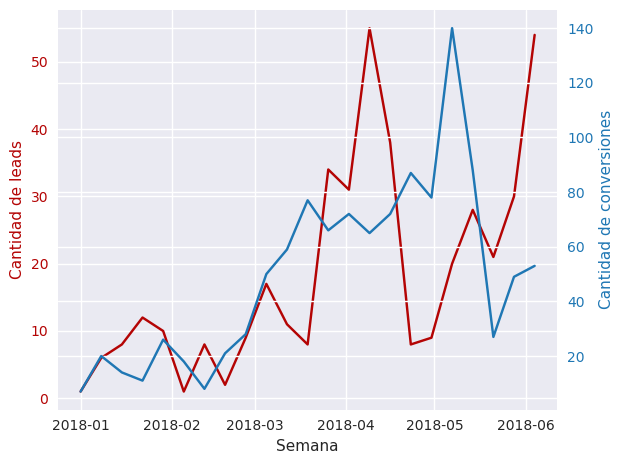

In [10]:
conversions_by_week = conversions.loc[:, ['timestamp']].copy()
conversions_by_week['semana'] = conversions_by_week['timestamp'].dt.week - 1
conversions_by_week = conversions_by_week[conversions_by_week['semana'] != conversions_by_week['semana'].max()] #Borro la ultima semana incompleta
conversions_by_week['semana'] = pd.to_datetime('2018', format='%Y') + pd.to_timedelta(conversions_by_week['semana'].mul(7).astype('str') + ' days')
conversions_weeks = conversions_by_week['semana'].value_counts().to_frame().sort_index()

fig, ax1 = plt.subplots()

color='#B40404'
ax1.set_xlabel('Semana')
ax1.set_ylabel('Cantidad de leads', color=color)
ax1.plot(leads_weeks['semana'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Cantidad de conversiones', color=color)
ax2.plot(conversions_weeks['semana'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

Notamos que en los momentos en que mas solicitudes de stock hay, las conversiones se estancan o disminuyen

### ¿Que marcas tienen mas solicitudes de notificacion de stock?

In [18]:
def obtener_marca(serie_de_modelo):
    # La marca es siempre la primer palabra del modelo
    r = []
    for modelo in serie_de_modelo.tolist():
        if pd.isna(modelo):
            r.append("Unknown")
        else:
            r.append(modelo.split()[0])
    return r

In [24]:
leads['marca'] = obtener_marca(leads['model'])
conversions['marca'] = obtener_marca(conversions['model'])

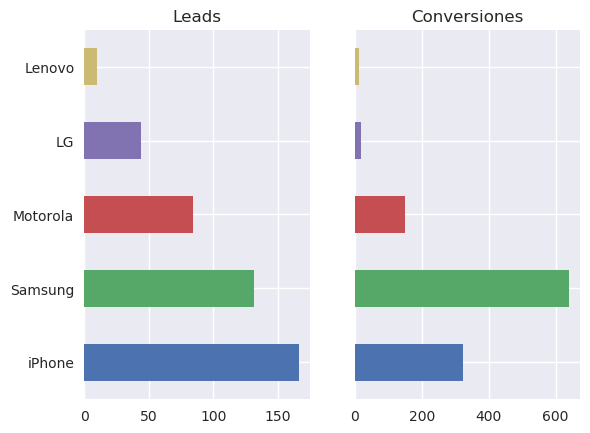

In [45]:
leads_count = leads['marca'].value_counts().to_frame()
conversions_count = conversions['marca'].value_counts().to_frame()
count = pd.concat([leads_count, conversions_count], axis=1, join_axes=[leads_count.index])
count.columns = ['leads','conversiones']
count = count.iloc[0:5]

fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True)

ax.yaxis.tick_left()

count['leads'].plot(kind='barh', x='LABEL',  legend=False, ax=ax)
count['conversiones'].plot(kind='barh', x='LABEL',ax=ax2)
ax.set_title('Leads')
ax2.set_title('Conversiones')
plt.show()

Vemos que los iphone son los que mayor cantidad de leads tienen y los Samsung quedan en segundo lugar, pero la cantidad de Samsung vendidos es el doble que la cantidad de iphones vendidos, lo que significa que hay un problema de stock para los iphone